In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from librosa import feature
import librosa.display as lplt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

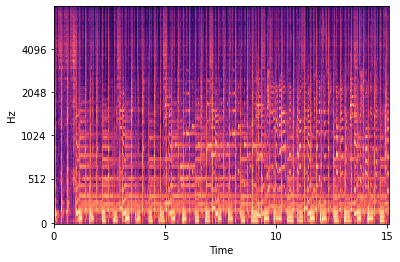

In [2]:
audio_path = 'C:/Users/chandu/Downloads/ML_project_Data/Data/genres_original/disco/disco.00000.wav'
y, sr = librosa.load(audio_path)
spect = feature.melspectrogram(y=y, hop_length=1024)
mel_spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

In [3]:
fit = StandardScaler()

def audio_features(file_path):
    y, sr = librosa.load(file_path)
    mel_spect = feature.melspectrogram(y=y, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    
    if(mel_spect.shape[1] > 645):
        mel_spect = mel_spect[:, :645]
    
    # Scaling the features
    mel_scaled = fit.fit_transform(mel_spect)    
    
    # Shape the data
    
    return mel_scaled

In [4]:
map_target = {
    'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6,
    'pop': 7, 'reggae': 8, 'rock': 9
}

In [7]:
target = []
features = []

root_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "Downloads\\ML_project_Data\\Data\\genres_original")
genres = os.listdir(root_dir)

for genre in genres:
    path = os.path.join(root_dir, genre)
    print(f'Reading {genre} Genre...')
    
    # Get list of files for a genre
    files = os.listdir(path)
    for file in files:
        file_path = os.path.join(path, file)
        try:
            data = audio_features(file_path)
            features.append(data)
            target.append(map_target[genre])
        except:
            pass

Reading blues Genre...
Reading classical Genre...
Reading country Genre...
Reading disco Genre...
Reading hiphop Genre...
Reading jazz Genre...


C:\Users\chandu\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Reading metal Genre...
Reading pop Genre...
Reading reggae Genre...
Reading rock Genre...


In [8]:
features = np.array(features)
target = np.array(target)

In [9]:
features.shape

(999, 128, 645)

In [10]:
target.shape

(999,)

In [11]:
target = to_categorical(target)
target.shape

(999, 10)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=45)

In [13]:
X_train.shape

(799, 128, 645)

In [14]:
X_test.shape

(200, 128, 645)

In [15]:
Y_train.shape

(799, 10)

In [16]:
Y_test.shape

(200, 10)

## Model Preparation

In [22]:
#Define Architecture
model = Sequential()

#Convolutional layers
model.add(Conv2D(100, (3, 3), input_shape = (128, 645, 1), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(100, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(100, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(100, (3, 3), activation = "relu"))
model.add(AveragePooling2D((2, 2)))

#Dense layers
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 643, 100)     1000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 321, 100)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 319, 100)      90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 159, 100)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 157, 100)      90100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 78, 100)      0

In [24]:
#Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
#Fit the model (or) train the model
model.fit(X_train, Y_train, epochs = 20, validation_data=(X_test, Y_test))

Epoch 1/20
 7/25 [=======>......................] - ETA: 1:50 - loss: 2.3330 - accuracy: 0.1027

KeyboardInterrupt: 

In [ ]:
def plot_validate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"])*100)
    pd.DataFrame(history.history).plot(figsize=(12, 6))

In [ ]:
plot_validate(model.history)

### Classification Report

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
Y_test

In [ ]:
Y_pred, test = [], []

for i in range(len(pred)):
    Y_pred.append(np.argmax(pred[i]))
    test.append(np.argmax(Y_test[i]))
    
Y_pred = np.array(Y_pred)
Y_test = np.array(test)

In [ ]:
Y_pred

In [ ]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average="weighted")
print('Accuracy: ', "%.2f" % (acc*100))
print('F1: ', "%.2f" % (f1*100))

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

In [ ]:
print("Confusion Matrix: \n", cm)
print("\n")
print("Classification Report: \n", cr)

In [ ]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [28]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Audio

In [29]:
df = pd.read_csv("./ML_project_Data/Data/features_30_sec.csv")

In [30]:
df = df.drop(labels="filename", axis=1)

In [31]:
audio_recording = "./ML_project_Data/Data/genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recording, sr=45600)

In [32]:
Audio(data, rate=sr)

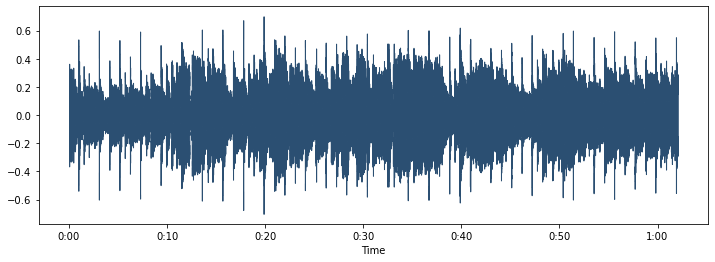

In [33]:
plt.figure(figsize=(12, 4))
lplt.waveshow(data, color="#2b4f72")

<ipython-input-34-7ef4225afdb8>:1: FutureWarning: Pass y=[ 0.05582627  0.07254332  0.06833789 ... -0.1285786  -0.10823352
 -0.04911855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


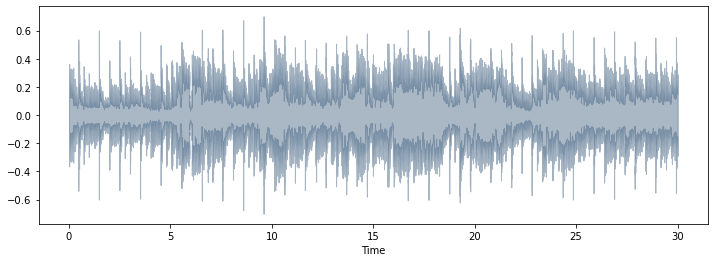

In [34]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
lplt.waveshow(data, sr=sr, alpha=0.4, color="#2b4f72")

<ipython-input-35-52cf0977079a>:1: FutureWarning: Pass y=[ 0.04582627  0.06254332  0.0583379  ... -0.13857861 -0.11823352
 -0.05911855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


Text(0.5, 1.0, 'Chroma Features')

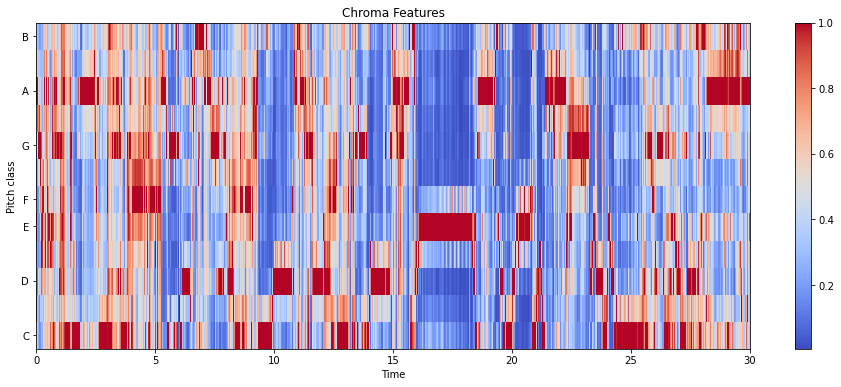

In [35]:
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")

In [36]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(class_list)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [37]:
classes = dict(enumerate(convertor.classes_))
classes

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [38]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X.shape

(1000, 58)

In [39]:
class ECG:
    def svm_classifier(self, X_train, Y_train, X_test):
        print("[INFO]: Training the model...")
        rbf = svm.SVC(kernel="rbf").fit(X_train, Y_train)
        rbf_pred = rbf.predict(X_test)
        return rbf_pred
    
    def GradientBoosting(self, X_train, Y_train, X_test):
        print("[INFO]: Training the model...")
        model = GradientBoostingClassifier()
        gb = model.fit(X_train, Y_train)
        gb_pred = gb.predict(X_test)
        return gb_pred
    
    def predict(self, Y_test, pred, labels):
        rbf_acc = accuracy_score(Y_test, pred)
        rbf_f1 = f1_score(Y_test, pred, average="weighted")
        print('\nAccuracy (RBF Kernel): ', "%.2f" % (rbf_acc*100))
        print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

        print("\n==================== CONFUSION MATRIX ====================\n")
        cm = confusion_matrix(Y_test, pred)
        print(cm)

        print("\n==================== CLASSIFICATION REPORT ====================\n")
        cr = classification_report(Y_test, pred)
        print(cr)

        print("\n==================== HEATMAP ====================\n")
        plt.figure(figsize=(10,7))
        sns.heatmap(cm,annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')

In [40]:
svm1 = ECG()
svm1_pred = svm1.svm_classifier(X_train, Y_train, X_test)
svm1.predict(Y_test, svm1_pred, labels)

[INFO]: Training the model...


ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
Gb = ECG()
gb_pred = Gb.GradientBoosting(X_train, Y_train, X_test)
Gb.predict(Y_test, gb_pred, labels)

### Saving Model

In [ ]:
print("Model started saving...")
model.save("Music_Genre_Classifier_cnn", save_format='tf')
print("Model saved successfully...")